In [1]:
#2 Confidence_interval

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import requests
#-----------
from tqdm import tqdm
from scipy import stats
from IPython.display import Image
from PIL import Image
#-----------
%matplotlib inline
plt.style.use("ggplot")

In [3]:
population = stats.norm.rvs(loc=2, scale=5, size=100000)

In [4]:
sample_size = 100
sample = np.random.choice(a = population, size = sample_size)


In [5]:
sample

array([  6.51807457,  -3.59961037,  -4.10338153,  -6.72802576,
         4.52914686,   3.39726751,   2.23302402,   5.33198865,
         5.49407163,   6.62997864,  11.89899336,   0.26650475,
        -0.40605339,   1.47905112,  -8.01555644,   4.86692279,
        -0.9304282 ,   2.63974555,   8.69229116,  -3.9683811 ,
         1.94859271,  -1.8054094 ,  11.55973041,   5.18943238,
         6.66859664,   1.34815923,   6.46551405,  -4.6488182 ,
         1.53459135,  -0.31275849,  -6.9448054 ,   9.44531483,
         2.31938154,  10.33490798,   0.80655245,  -4.33956142,
        -0.29961113,  -1.75767314,  -0.21494725,  -3.44047746,
         0.8242753 ,   9.80255771,  -3.4301303 ,  -3.14559966,
        -3.84673463,   1.58753542,  -6.61616963,  -0.79663032,
         6.53728063,  -3.03940582,   2.26192955,  -0.21620192,
         1.05149238,  -0.07794968,  -2.56952599,  -2.25919023,
        -0.20490625,   1.0220084 ,   5.00697972,   1.43142005,
        -6.1572514 ,   1.42881774,  -3.17124876,   0.88

In [6]:
sample_mean = sample.mean()
sample_mean

1.107469023708091

In [7]:
st_dev = population.std()
st_dev

5.000306283646085

In [8]:
z_value = stats.norm.ppf(q = 0.975)
print("z-value:", z_value)


z-value: 1.959963984540054


In [9]:
z_value = stats.norm.ppf(q = 0.025)
print("z-value:", z_value)


z-value: -1.9599639845400545


In [10]:
interval = z_value * (st_dev/np.sqrt(sample_size))
conf_inv = (sample_mean - interval, sample_mean + interval)
print("Confidence interval:", conf_inv)


Confidence interval: (2.0875110464696567, 0.1274270009465257)


In [11]:
# def "Confidence interval"
def compute_ci(sample, st_dev):
    z_value = stats.norm.ppf(q = 0.975)
    sample_size = len(sample)
    interval = z_value * (st_dev/np.sqrt(sample_size))
    conf_inv = (sample_mean - interval, sample_mean + interval)
    return conf_inv

In [12]:
np.random.seed(5)
sample_size = 2000
sample = np.random.choice(a = population, size = sample_size)
ci = compute_ci(sample, st_dev)
print("conf interval for 2000 sample size:", ci)


conf interval for 2000 sample size: (0.8883249653379655, 1.3266130820782167)


In [13]:
# Student's t-test  Statistical hypothesis testing
def compute_ci_t(sample, alpha=0.95):
    n = sample.shape[0]
    mu, se = np.mean(sample), stats.sem(sample)
    bound = se * stats.t.ppf((1 + alpha) / 2., n-1)
    return mu - bound, mu + bound


In [14]:
sample = np.random.choice(a = population, size = 30)
ci_t = compute_ci_t(sample, alpha=0.95)
print("conf interval with t test for 2000 sample size:", ci_t)


conf interval with t test for 2000 sample size: (-0.6157685248704969, 3.3529027166131535)


#### Play with "Taxi" data sets

In [22]:
taxi = pd.read_csv("data_sets/taxi_sample.csv", index_col=0)

In [16]:
taxi.head(3)

vendor_id  rate_code  passenger_count  trip_time_in_secs  trip_distance  \
0       CMT          1                1               1271            3.8   
1       CMT          1                1                474            1.5   
2       CMT          1                1                637            1.4   

  payment_type  fare_amount  
0          CRD         17.5  
1          CRD          8.0  
2          CRD          8.5

In [17]:
#pd.isnull(taxi.trip_distance)
#from tqdm.auto import tqdm
taxi.dtypes

vendor_id             object
rate_code              int64
passenger_count        int64
trip_time_in_secs      int64
trip_distance        float64
payment_type          object
fare_amount          float64
dtype: object

In [18]:
def generate_distribution_sample(data, sample_size, dist_size):
    sample_means = []
    for i in tqdm(range(dist_size)):
        sample = np.random.choice(a = data, size = sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

In [19]:
sample_size = 10000
dist_size = 50000

In [20]:
sample_means = generate_distribution_sample(taxi["trip_distance"], sample_size, dist_size)

100%|███████████████████████████████████████████████| 50000/50000 [00:21<00:00, 2336.59it/s]


Text(0.5, 0, 'distance in km')

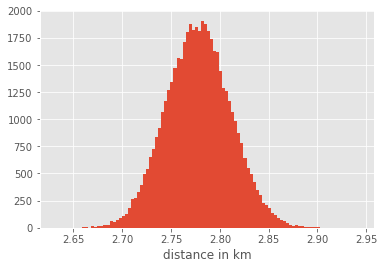

In [21]:
plt.hist(sample_means, bins=100)
plt.xlabel("distance in km")


In [23]:
np.sort(sample_means)
lb = np.percentile(sample_means, 2.5)
ub = np.percentile(sample_means, 97.5)
print("conf interval for bootstrap:", (lb, ub))

conf interval for bootstrap: (2.7137347999999997, 2.8432701750000007)
